In [1]:
import numpy as np
import pandas as pd
import scipy as sc
np.random.seed(1)
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go
from sklearn.metrics import log_loss
init_notebook_mode(connected=True)

In [2]:
N =100
D = 2
X=pd.DataFrame(np.hstack([np.ones([N, 1]),np.random.randn(N,D)]))
X.iloc[:50,[1,2]] = X.iloc[:50,[1,2]] -2
X.iloc[50:,[1,2]] = X.iloc[50:,[1,2]] +2
y_true = np.hstack((np.zeros(50),np.ones(50)))
# Random weights 
w_0 = np.random.randn(D+1)
print(w_0)

[-0.40087819  0.82400562 -0.56230543]


In [3]:
l = 0.1
for i in range(100):
    y_pred = sc.special.expit(X.dot(w_0)).values
    if i%10 == 0:
        print(log_loss(y_true,y_pred,normalize=False))
    w_new = w_0 +(l*(y_true - y_pred).dot(X)).reshape(D+1)
    w_0 = w_new
    
print(w_new)

53.94476269944936
0.0001677711911037888
0.00016769886097457078
0.00016762660372373448
0.0001675544192374536
0.00016748230740201304
0.00016741026810580717
0.00016733830123612033
0.00016726640667957043
0.00016719458432544048
[0.01884387 7.38868323 8.12061432]


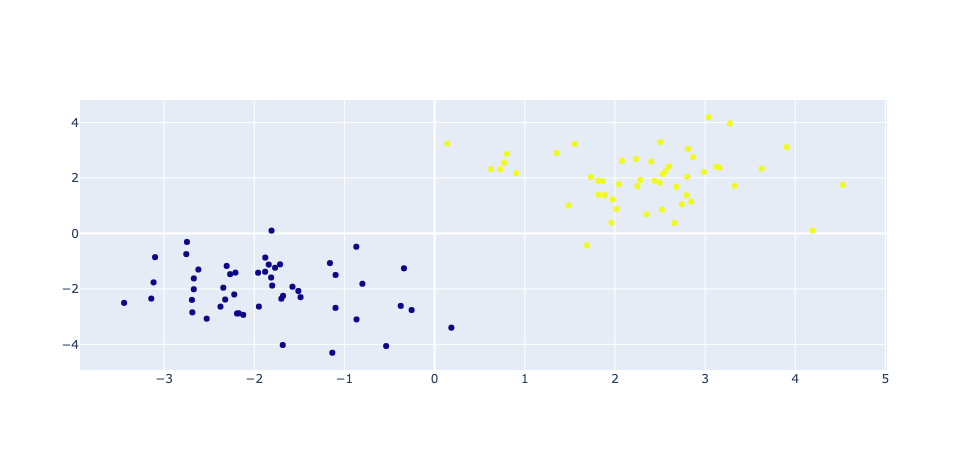

In [4]:
fig = go.Figure()


fig.add_trace(go.Scatter(x= X.iloc[:,[1]].values.reshape(-1)
                         ,y=X.iloc[:,[2]].values.reshape(-1),mode ='markers',
                         marker=dict(color=y_true)))


fig.show()

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, penalty = 'l2',fit_intercept= False)
clf.fit(X,y_true)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [6]:
clf.coef_

array([[-0.13165064,  1.50107793,  1.24319932]])